In [43]:
import numpy as np
import networkx as nx
import matplotlib as plt

from fairpair import FairPairGraph, Distributions, random_list_to_pairs, RandomSampling

In [2]:
# Initialize the graph with nodes labeled majority or minority
G = FairPairGraph()
G.generate_groups(500, 200)

for i in range(298, 303):
    print(G.nodes(data=True)[i])

{'minority': False}
{'minority': False}
{'minority': True}
{'minority': True}
{'minority': True}


In [3]:
# Add randomization to the group label attribution
G = FairPairGraph()
G.add_nodes_from(np.arange(500))
G.label_minority(200, random=True)

for i in range(5):
    print(G.nodes(data=True)[i])

{'minority': False}
{'minority': True}
{'minority': True}
{'minority': False}
{'minority': True}


In [4]:
# Access the minority subgraph (read-only)
G.minority

In [5]:
# Access the majority nodes
G.majority_nodes[:20]

[0, 3, 5, 6, 7, 8, 9, 12, 13, 19, 20, 21, 22, 25, 29, 30, 31, 32, 35, 37]

In [6]:
# Assign scores to the majority and minority respectively
G.group_assign_scores(nodes=G.majority_nodes, distr=Distributions.normal_distr)
G.group_assign_scores(nodes=G.minority_nodes, distr=Distributions.normal_distr, loc=0.4) # give a disadvantage to the minority
G.nodes(data=True)[11]

{'minority': True, 'score': 0.39549950066052675}

In [7]:
# Compare pairs using the BTL-model
print('before:', G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))
G.compare_pair(1, 5, k=30)
print('after:', G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))

before: 0.15043918148798602 0.44745616443098124 []
after: 0.15043918148798602 0.44745616443098124 [(1, 5, {'wins': 23, 'weight': 0.7666666666666667}), (5, 1, {'wins': 7, 'weight': 0.23333333333333328})]


In [8]:
# Sum up additional comparisons with already existing ones
G.compare_pair(1, 5, k=30)
print(G.nodes[1]['score'], G.nodes[5]['score'], G.edges(data=True))

0.15043918148798602 0.44745616443098124 [(1, 5, {'wins': 44, 'weight': 0.7333333333333333}), (5, 1, {'wins': 16, 'weight': 0.2666666666666667})]


In [9]:
random_list_to_pairs(G, range(10))

[(8, 7), (4, 2), (1, 9), (6, 0), (3, 5)]

In [66]:
# Generate a new Graph to test random sampling
G = FairPairGraph()
G.generate_groups(20, 5)
G.group_assign_scores(nodes=G.majority_nodes, distr=Distributions.normal_distr)
G.group_assign_scores(nodes=G.minority_nodes, distr=Distributions.normal_distr, loc=0.1) # give a disadvantage to the minority
G.edges(data=True)

OutEdgeDataView([])

In [67]:
sampling = RandomSampling(G)
sampling.apply(iter = 8)

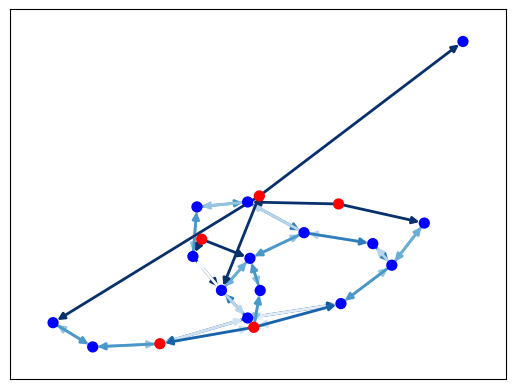

In [68]:
pos=nx.drawing.layout.spring_layout(G)
colors = ['red' if node[1]['minority'] else 'blue' for node in G.nodes(data=True)]
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.drawing.nx_pylab.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=50, edge_color=weights, width=2, edge_cmap=plt.cm.Blues)

In [69]:
for node in G.nodes(data=True):
    node[1]['minority'] = bool(node[1]['minority']) # convert from numpy
nx.write_gexf(G, './data/fairpairgraphtest.gexf')